The first challenge with the Pokemon data is that there is no pre-determined number of clusters. You will determine the appropriate number of clusters, keeping in mind that in real data the elbow in the scree plot might be less of a sharp elbow than in synthetic data. Use your judgement on making the determination of the number of clusters.

The second part of this exercise includes plotting the outcomes of the clustering on two dimensions, or features, of the data. These features were chosen somewhat arbitrarily for this exercise. Think about how you would use plotting and clustering to communicate interesting groups of Pokemon to other people.

An additional note: this exercise utilizes the iter.max argument to `kmeans()`. As you've seen, `kmeans()` is an iterative algorithm, repeating over and over until some stopping criterion is reached. The default number of iterations for `kmeans()` is 10, which is not enough for the algorithm to converge and reach its stopping criterion, so we'll set the number of iterations 

In [18]:
library(tidyverse)
# setting the graphic width and height for ggplot
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

data <- read.csv("pokemon.csv")
pokemonselect <- data %>% select(6:11)
pokemon <- as.matrix(pokemonselect)
head(pokemon)
str(pokemon)
class(pokemon)

HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed
45,49,49,65,65,45
60,62,63,80,80,60
80,82,83,100,100,80
80,100,123,122,120,80
39,52,43,60,50,65
58,64,58,80,65,80


 int [1:800, 1:6] 45 60 80 80 39 58 78 78 78 44 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "HitPoints" "Attack" "Defense" "SpecialAttack" ...


[1] "matrix"

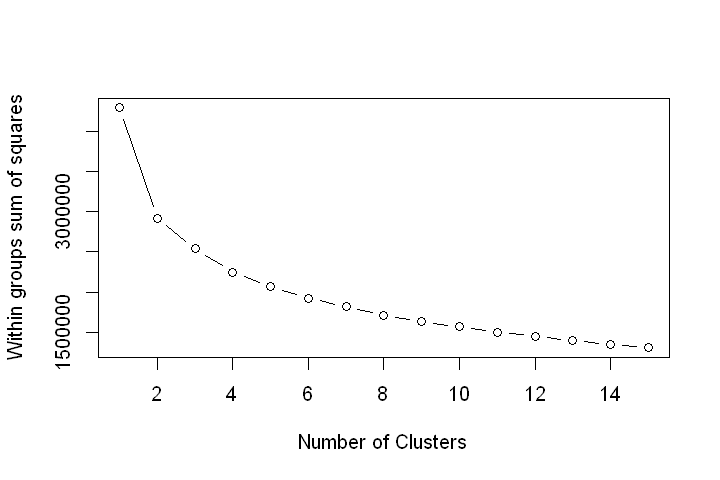

In [19]:
# Initialize total within sum of squares error: wss
wss <- 0

# Look over 1 to 15 possible clusters
for (i in 1:15) {
  # Fit the model: km.out
  km.out <- kmeans(pokemon, centers = i, nstart = 20, iter.max = 50)
  # Save the within cluster sum of squares
  wss[i] <- km.out$tot.withinss
}

# Produce a scree plot
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")



K-means clustering with 3 clusters of sizes 270, 175, 355

Cluster means:
  HitPoints   Attack   Defense SpecialAttack SpecialDefense    Speed
1  81.90370 96.15926  77.65556     104.12222       86.87778 94.71111
2  79.30857 97.29714 108.93143      66.71429       87.04571 57.29143
3  54.68732 56.93239  53.64507      52.02254       53.04789 53.58873

Clustering vector:
  [1] 3 3 1 1 3 3 1 1 1 3 3 2 1 3 3 3 3 3 3 1 3 3 1 1 3 3 3 1 3 1 3 1 3 2 3 3 2
 [38] 3 3 1 3 1 3 1 3 3 3 1 3 3 1 3 2 3 1 3 3 3 1 3 1 3 1 3 1 3 3 2 3 1 1 1 3 2
 [75] 2 3 3 1 3 1 3 2 2 3 1 3 2 2 3 1 3 3 1 3 2 3 2 3 2 3 1 1 1 2 3 2 3 2 3 1 3
[112] 1 3 2 2 2 3 3 2 3 2 3 2 2 2 3 1 3 2 3 1 1 1 1 1 1 2 2 2 3 2 2 2 3 3 1 1 1
[149] 3 3 2 3 2 1 1 2 1 1 1 3 3 1 1 1 1 1 3 3 2 3 3 1 3 3 2 3 3 3 1 3 3 3 3 1 3
[186] 1 3 3 3 3 3 3 1 3 3 1 1 2 3 3 2 1 3 3 1 3 3 3 3 3 2 1 2 3 2 1 3 3 1 3 2 3
[223] 2 2 2 3 2 3 2 2 2 2 2 3 3 2 3 2 3 2 3 3 1 3 1 2 3 1 1 1 3 2 1 1 3 3 2 3 3
[260] 3 2 1 1 1 2 3 3 2 2 1 1 1 3 3 1 1 3 3 1 1 3 3 2 2 3 3 3 3 3 3 3 

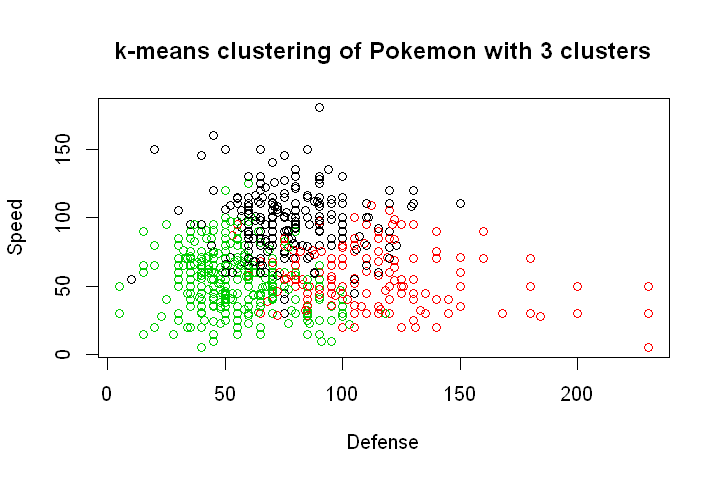

In [20]:
# Select number of clusters
k <- 3

# Build model with k clusters: km.out
km.out <- kmeans(pokemon, centers = k, nstart = 20, iter.max = 50)

# View the resulting model
km.out

# Plot of Defense vs. Speed by cluster membership
plot(pokemon[, c("Defense", "Speed")],
     col = km.out$cluster,
     main = paste("k-means clustering of Pokemon with", k, "clusters"),
     xlab = "Defense", ylab = "Speed")

## k-means clustering

In this exercise, your task is to create a k-means model of the x data using 3 clusters, then to look at the structure of the resulting model using the summary() function.

In [39]:
km.out <- kmeans(pokemon, centers = 3, nstart = 20)
summary(km.out)

             Length Class  Mode   
cluster      800    -none- numeric
centers       18    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

### Results of kmeans()

The `kmeans()` function produces several outputs. In the video, we discussed one output of modeling, the cluster membership.

In this exercise, you will access the cluster component directly. This is useful anytime you need the cluster membership for each observation of the data used to build the clustering model. A future exercise will show an example of how this cluster membership might be used to help communicate the results of k-means modeling.

In [22]:
km.out$cluster

[1] 1 1 2 2 1 1 2 2 2 1 1 3 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 1 3 1 1 3
 [38] 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 3 1 2 1 1 1 2 1 2 1 2 1 2 1 1 3 1 2 2 2 1 3
 [75] 3 1 1 2 1 2 1 3 3 1 2 1 3 3 1 2 1 1 2 1 3 1 3 1 3 1 2 2 2 3 1 3 1 3 1 2 1
[112] 2 1 3 3 3 1 1 3 1 3 1 3 3 3 1 2 1 3 1 2 2 2 2 2 2 3 3 3 1 3 3 3 1 1 2 2 2
[149] 1 1 3 1 3 2 2 3 2 2 2 1 1 2 2 2 2 2 1 1 3 1 1 2 1 1 3 1 1 1 2 1 1 1 1 2 1
[186] 2 1 1 1 1 1 1 2 1 1 2 2 3 1 1 3 2 1 1 2 1 1 1 1 1 3 2 3 1 3 2 1 1 2 1 3 1
[223] 3 3 3 1 3 1 3 3 3 3 3 1 1 3 1 3 1 3 1 1 2 1 2 3 1 2 2 2 1 3 2 2 1 1 3 1 1
[260] 1 3 2 2 2 3 1 1 3 3 2 2 2 1 1 2 2 1 1 2 2 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 2
[297] 1 1 2 1 1 1 3 1 1 2 2 1 1 1 3 1 1 2 1 2 1 1 1 2 1 3 1 3 1 1 1 3 1 3 1 3 3
[334] 3 1 1 2 1 2 2 1 1 1 1 1 1 3 1 2 2 1 2 1 2 3 3 1 2 1 1 1 2 1 2 1 3 2 2 2 2
[371] 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 2 2 1 3 3 1 2 2 1 1 2 2 1 1 2 1 3 3 3 1 1
[408] 3 2 2 1 3 3 2 3 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 1 3 3 1 1 2 1 1 2 1 1 2
[445] 1 1 1 1 1 1 2 1 2 1 3 1 3 1 3 3 3 2 1 3 1 1 2 1 2 1 3 2 1 2 1 2 2 2 2 1 2
[482] 1 1 2 1 3 1 1 1 1 3 1 1 2 2 1 1 2 2 1 3 1 3 1 2 3 1 2 1 1 2 3 2 2 3 3 3 2
[519] 2 2 2 3 2 3 2 2 2 2 3 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 1
[556] 1 2 1 1 2 1 1 2 1 1 1 1 3 1 2 1 2 1 2 1 2 1 3 1 1 2 1 2 1 3 3 1 2 1 2 3 3
[593] 1 3 3 1 1 2 3 3 1 1 2 1 1 2 1 2 1 2 2 1 1 2 1 3 2 2 1 3 1 3 2 1 3 1 3 1 2
[630] 1 3 1 2 1 2 1 1 3 1 1 2 1 2 1 1 2 1 2 2 1 3 1 3 1 2 3 1 2 1 3 1 3 3 1 1 2
[667] 1 2 1 1 2 1 3 3 1 3 2 1 2 3 1 2 3 1 3 1 3 3 1 3 1 3 2 3 1 1 2 1 2 2 2 2 2
[704] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 3 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2
[741] 1 2 1 3 2 1 2 2 1 3 2 3 1 3 1 2 1 3 1 3 1 3 1 2 1 2 1 3 1 2 2 2 2 3 1 2 2
[778] 3 1 3 1 1 1 1 3 3 3 3 1 3 1 2 2 2 3 3 2 2 2 2

### Handling random algorithms

In the video, you saw how `kmeans()` randomly initializes the centers of clusters. This random initialization can result in assigning observations to different cluster labels. Also, the random initialization can result in finding different local minima for the k-means algorithm. This exercise will demonstrate both results.

At the top of each plot, the measure of model quality—total within cluster sum of squares error—will be plotted. Look for the model(s) with the lowest error to find models with the better model results.

Because `kmeans()` initializes observations to random clusters, it is important to set the random number generator seed for reproducibility.

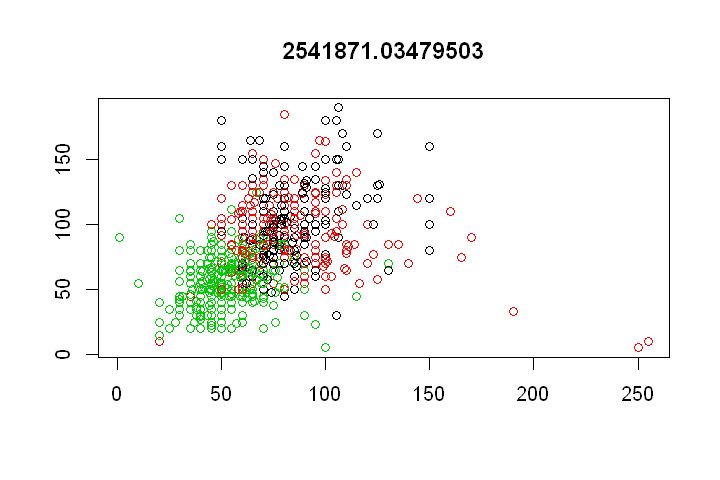

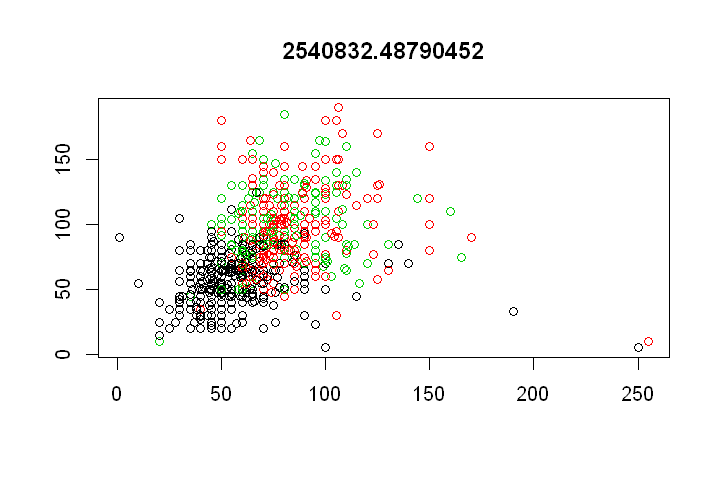

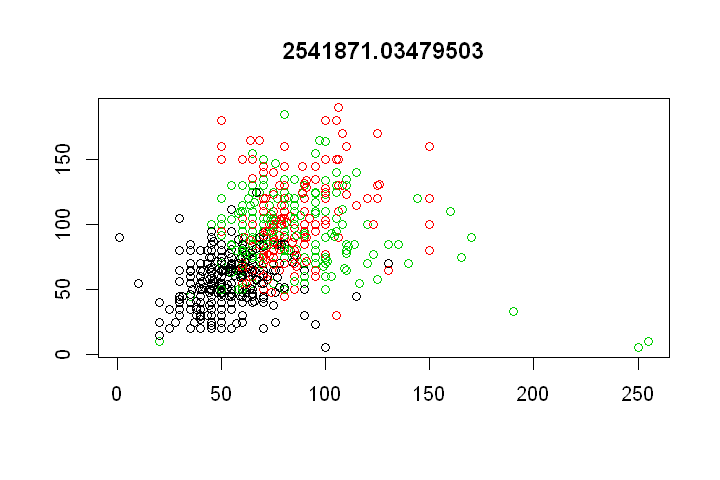

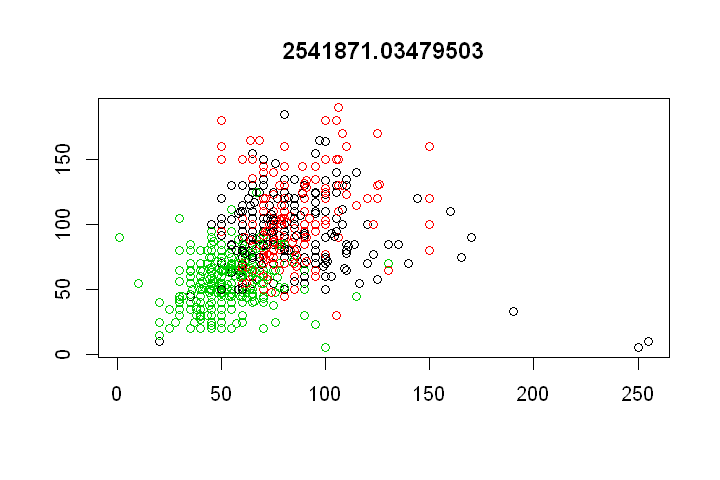

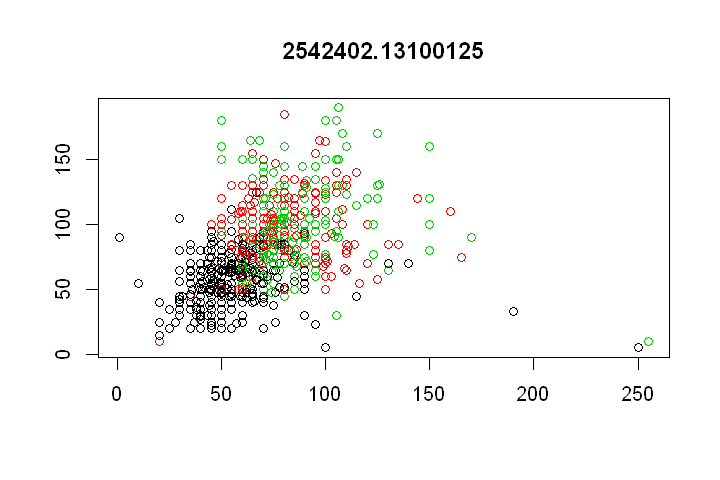

In [24]:
# Set seed
set.seed(1)

for(i in 1:6) {
  # Run kmeans() on x with three clusters and one start
  km.out <- kmeans(pokemon, centers = 3, nstart = 1)
  
  # Plot clusters
  plot(pokemon, col = km.out$cluster, 
       main = km.out$tot.withinss, 
       xlab = "", ylab = "")
}

### Selecting number of clusters

The k-means algorithm assumes the number of clusters as part of the input. If you know the number of clusters in advance (e.g. due to certain business constraints) this makes setting the number of clusters easy. However, as you saw in the video, if you do not know the number of clusters and need to determine it, you will need to run the algorithm multiple times, each time with a different number of clusters. From this, you can observe how a measure of model quality changes with the number of clusters.

In this exercise, you will run kmeans() multiple times to see how model quality changes as the number of clusters changes. Plots displaying this information help to determine the number of clusters and are often referred to as scree plots.

The ideal plot will have an elbow where the quality measure improves more slowly as the number of clusters increases. This indicates that the quality of the model is no longer improving substantially as the model complexity (i.e. number of clusters) increases. In other words, the elbow indicates the number of clusters inherent in the data.

Warning message:
"did not converge in 10 iterations"

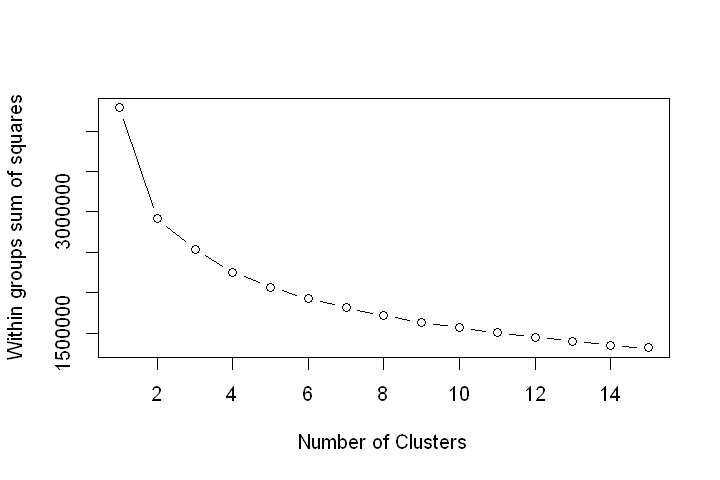

In [25]:
# Initialize total within sum of squares error: wss
wss <- 0

# For 1 to 15 cluster centers
for (i in 1:15) {
  km.out <- kmeans(pokemon, centers = i, nstart = 20)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss
}

# Plot total within sum of squares vs. number of clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

# Set k equal to the number of clusters corresponding to the elbow location
k <- 2

# Hierarchical clustering 

In this exercise, you will create your first hierarchical clustering model using the hclust() function.

We have created some data that has two dimensions and placed it in a variable called x. Your task is to create a hierarchical clustering model of x. Remember from the video that the first step to hierarchical clustering is determining the similarity between observations, which you will do with the dist() function.

You will look at the structure of the resulting model using the summary() function.

In [30]:
head(data)
x <- select(data, Attack, Defense)
class(x)

Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False


[1] "data.frame"

In [31]:
# Create hierarchical clustering model: hclust.out
hclust.out <- hclust(dist(x))

# Inspect the result
summary(hclust.out)

            Length Class  Mode     
merge       1598   -none- numeric  
height       799   -none- numeric  
order        800   -none- numeric  
labels         0   -none- NULL     
method         1   -none- character
call           2   -none- call     
dist.method    1   -none- character

### Cutting the tree

Remember from the video that `cutree()` is the R function that cuts a hierarchical model. The h and k arguments to `cutree()` allow you to cut the tree based on a certain height h or a certain number of clusters k.


In this exercise, you will use `cutree()` to cut the hierarchical model you created earlier based on each of these two criteria.

In [35]:
# Cut by height
cutree(hclust.out, h = 150)

# Cut by number of clusters
cutree(hclust.out, k = 3)

[1] 1 1 2 2 1 1 2 3 3 1 1 2 2 1 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 2
 [38] 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 3 1 1 2 1 1 1 1 1 1
 [75] 3 1 1 1 1 1 2 2 3 1 1 1 2 4 1 2 1 1 1 1 1 1 3 2 4 1 1 1 1 2 1 1 3 3 1 1 2
[112] 2 2 2 3 3 1 2 2 2 3 1 2 2 3 1 2 1 1 1 2 1 3 1 1 1 3 3 2 1 3 3 2 1 1 1 1 3
[149] 1 2 2 2 2 1 3 1 2 2 2 1 1 3 3 3 3 2 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1
[186] 1 1 1 1 1 2 1 1 1 1 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 2 1
[223] 2 4 4 1 3 1 3 3 4 3 3 1 1 3 1 2 1 3 2 1 3 1 1 2 1 1 2 2 1 3 2 1 1 1 2 1 1
[260] 1 2 1 2 3 2 1 1 3 3 2 3 2 1 1 1 3 1 1 3 3 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 2 3 2 1 1 1 1 1 1 3 1 2 1 1 1 2 2 2 2 2 4
[334] 4 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 3 2 1 1 1 1 1 3 1 3 1 2 2 3 1 1
[371] 2 1 1 1 3 1 2 2 2 1 3 1 1 1 1 1 3 3 2 2 2 1 3 3 1 1 2 3 1 1 2 2 2 2 2 1 1
[408] 2 3 3 2 2 3 3 4 2 2 2 2 2 3 2 3 3 3 3 3 2 3 3 2 2 1 2 2 1 1 1 1 1 2 1 1 3
[445] 1 1 1 1 1 1 3 1 1 3 3 2 2 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 3 1 3 1 1
[482] 1 1 1 2 2 2 1 1 1 2 1 1 3 3 1 1 1 3 1 2 2 2 1 1 1 1 1 1 1 1 3 3 2 2 3 2 3
[519] 1 2 2 2 2 2 3 1 3 3 2 2 1 2 2 2 2 2 2 2 2 3 3 3 2 3 2 3 2 2 2 2 2 3 3 2 1
[556] 1 2 1 1 3 1 1 2 1 1 1 1 3 1 1 1 1 1 1 1 1 1 2 1 1 3 1 1 2 2 3 1 1 1 3 2 2
[593] 1 3 3 1 1 1 2 3 1 2 3 1 2 2 1 2 1 1 1 1 1 3 1 3 2 1 2 2 1 2 1 2 2 2 2 1 3
[630] 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 1 1 1 1 2 2 1 2 2 1 1 3
[667] 1 1 1 1 2 1 3 3 1 3 1 2 1 2 1 3 3 1 3 1 3 3 1 3 1 2 1 2 1 1 3 1 1 2 3 1 3
[704] 3 3 1 3 3 3 3 3 3 3 2 2 1 3 3 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[741] 1 1 1 3 1 1 2 2 2 2 3 2 1 1 1 2 1 2 1 2 1 2 1 2 1 1 2 3 1 1 1 1 1 2 1 1 1
[778] 2 1 3 1 1 1 1 2 2 2 2 2 4 1 1 3 3 2 2 3 1 3 2

[1] 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 [75] 2 1 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 1 1 1 1 1 2 1 3 1 1 1 1 1 1 1 2 2 1 1 1
[112] 1 1 1 2 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 1 1 1 1 1 2
[149] 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 3 3 1 2 1 2 2 3 2 2 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
[260] 1 1 1 1 2 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3
[334] 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1
[371] 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1
[408] 1 2 2 1 1 2 2 3 1 1 1 1 1 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2
[445] 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1
[482] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 2
[519] 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 2 1 1 1 1 1 2 2 1 1
[556] 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1
[593] 1 2 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2
[630] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
[667] 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 2 1 2 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2
[704] 2 2 1 2 2 2 2 2 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[741] 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
[778] 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 2 2 1 1 2 1 2 1

The output of each cutree() call represents the cluster assignments for each observation in the original dataset. 

### Linkage methods

In this exercise, you will produce hierarchical clustering models using different linkages and plot the dendrogram for each, observing the overall structure of the trees.

You'll be asked to interpret the results in the next exercise.

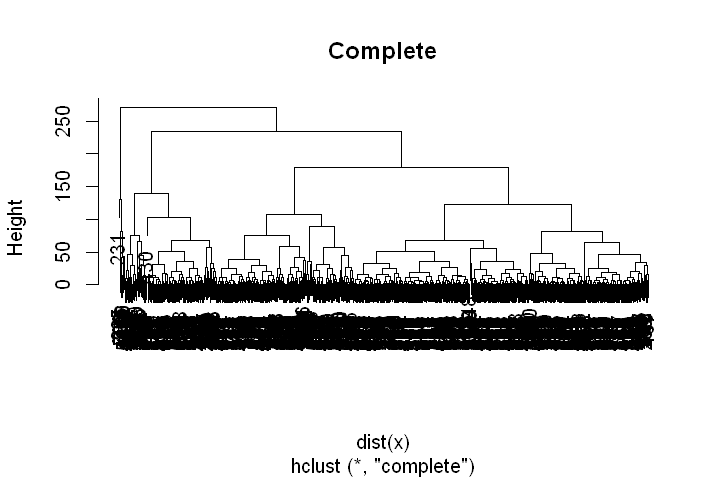

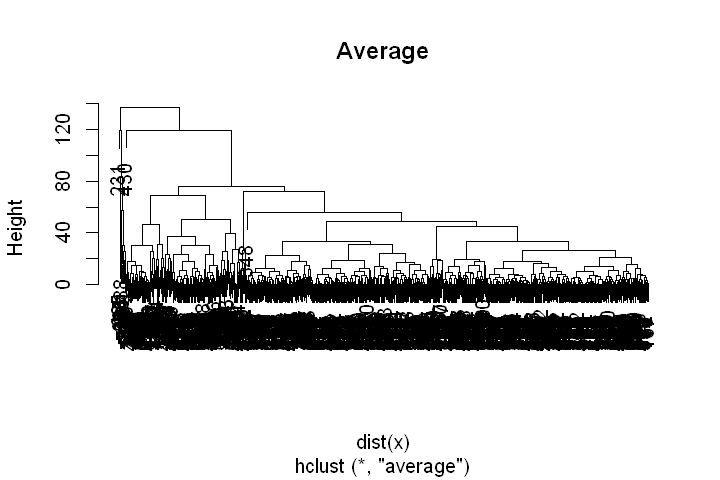

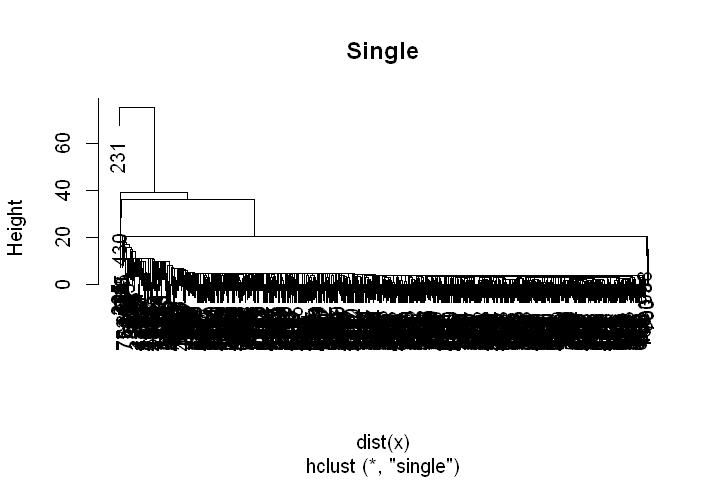

In [36]:
# Cluster using complete linkage: hclust.complete
hclust.complete <- hclust(dist(x), method = "complete")

# Cluster using average linkage: hclust.average
hclust.average <- hclust(dist(x), method = "average")

# Cluster using single linkage: hclust.single
hclust.single <- hclust(dist(x), method = "single")

# Plot dendrogram of hclust.complete
plot(hclust.complete, main = "Complete")

# Plot dendrogram of hclust.average
plot(hclust.average, main = "Average")

# Plot dendrogram of hclust.single
plot(hclust.single, main = "Single")

 Whether you want balanced or unbalanced trees for your hierarchical clustering model depends on the context of the problem you're trying to solve. Balanced trees are essential if you want an even number of observations assigned to each cluster. On the other hand, if you want to detect outliers, for example, an unbalanced tree is more desirable because pruning an unbalanced tree can result in most observations assigned to one cluster and only a few observations assigned to other clusters. 

# Pactical matters: scaling

Recall from the video that clustering real data may require scaling the features if they have different distributions. So far in this chapter, you have been working with synthetic data that did not need scaling.

In this exercise, you will go back to working with "real" data, the pokemon dataset introduced in the first chapter. You will observe the distribution (mean and standard deviation) of each feature, scale the data accordingly, then produce a hierarchical clustering model using the complete linkage method.

In [37]:
# View column means
colMeans(pokemon)

# View column standard deviations, 
# Since the variables are the columns of your matrix, make sure to specify 2 as the MARGIN argument to apply()
apply(pokemon, 2, sd )

# Scale the data
pokemon.scaled <- scale(pokemon)

# Create hierarchical clustering model: hclust.pokemon
hclust.pokemon <- hclust(dist(pokemon.scaled), method = "complete")

HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
      69.25875       79.00125       73.84250       72.82000       71.90250 
         Speed 
      68.27750

HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
      25.53467       32.45737       31.18350       32.72229       27.82892 
         Speed 
      29.06047

Let's quickly recap what you just did. You first checked to see if the column means and standard deviations vary. Because they do, you scaled the data, converted the scaled data to a similarity matrix and passed it into the hclust() function. 

## Comparing kmeans() and hclust()

Comparing k-means and hierarchical clustering, you'll see the two methods produce different cluster memberships. This is because the two algorithms make different assumptions about how the data is generated. In a more advanced course, we could choose to use one model over another based on the quality of the models' assumptions, but for now, it's enough to observe that they are different.

This exercise will have you compare results from the two models on the pokemon dataset to see how they differ.

In [43]:
km.pokemon <- kmeans(pokemon, centers = 3, nstart = 20, iter.max = 50)

# Apply cutree() to hclust.pokemon: cut.pokemon
cut.pokemon <- cutree(hclust.pokemon, k = 3)

# Compare methods
table(cut.pokemon, km.pokemon$cluster)

           
cut.pokemon   1   2   3
          1 171 267 350
          2   3   3   5
          3   1   0   0

Looking at the table, it looks like the hierarchical clustering model assigns most of the observations to cluster 1, while the k-means algorithm distributes the observations relatively evenly among all clusters. It's important to note that there's no consensus on which method produces better clusters. The job of the analyst in unsupervised clustering is to observe the cluster assignments and make a judgment call as to which method provides more insights into the data. 

# Dimensionality reduction - principal components analysis 
### PCA using prcomp()

In this exercise, you will create your first PCA model and observe the diagnostic results.

We have loaded the Pokemon data from earlier, which has four dimensions, and placed it in a variable called pokemon. Your task is to create a PCA model of the data, then to inspect the resulting model using the summary() function.

In [46]:
dataselected<- select(data, HitPoints, Attack, Defense, Speed)
pokemon <- as.matrix(dataselected)
# Perform scaled PCA: pr.out
pr.out <- prcomp(pokemon, scale = TRUE)

# Inspect model output
summary(pr.out)

Importance of components:
                          PC1    PC2    PC3    PC4
Standard deviation     1.3721 0.9933 0.8526 0.6354
Proportion of Variance 0.4707 0.2467 0.1817 0.1009
Cumulative Proportion  0.4707 0.7173 0.8991 1.0000

The first two principal components describe around 72% of the variance. 

### Additional results of PCA

PCA models in R produce additional diagnostic and output components:

* center: the column means used to center to the data, or FALSE if the data weren't centered
* scale: the column standard deviations used to scale the data, or FALSE if the data weren't scaled
* rotation: the directions of the principal component vectors in terms of the original features/variables. This information allows you to define new data in terms of the original principal components
* x: the value of each observation in the original dataset projected to the principal components

You can access these the same as other model components. For example, use pr.out$rotation to access the rotation component.

Which of the following statements is not correct regarding the pr.out model fit on the pokemon data?

In [48]:
pr.out$center

HitPoints    Attack   Defense     Speed 
 69.25875  79.00125  73.84250  68.27750

In [49]:
pr.out$scale

HitPoints    Attack   Defense     Speed 
 25.53467  32.45737  31.18350  29.06047

In [50]:
pr.out$rotation

,PC1,PC2,PC3,PC4
HitPoints,0.5009303,-0.06463396,0.8300858,-0.2363236
Attack,0.6301797,0.02703796,-0.1621455,0.7588487
Defense,0.4556878,-0.61865282,-0.4521283,-0.4529871
Speed,0.3798566,0.78253440,-0.2832778,-0.4038596


In [51]:
pr.out$x

PC1,PC2,PC3,PC4
-1.72568446,-0.097546271,-0.05163582,0.207456766
-0.77836450,0.001484139,0.02184005,-0.039259320
0.55598789,0.109293957,0.08715421,-0.325236471
1.48999317,-0.669275804,-0.58272583,-0.485458941
-1.61139724,0.577730653,-0.36963560,0.142341152
-0.59040917,0.645964030,-0.17563029,-0.179301322
0.74394322,0.753773847,-0.11031614,-0.465278473
2.11929395,0.137402684,-0.81858156,0.130820647
1.13225550,0.770434451,-0.21022907,0.002318739
-1.55705053,-0.467129383,-0.29163598,-0.011297649


### Interpreting biplots

As stated in the video, the `biplot()` function plots both the principal components loadings and the mapping of the observations to their first two principal component values. The next couple of exercises will check your interpretation of the `biplot()` visualization.

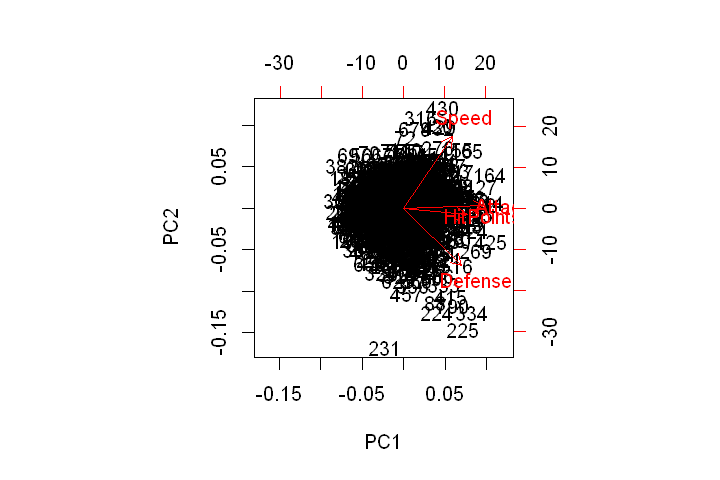

In [52]:
biplot(pr.out)

HitPoint and Attack have approximately the same loadings in the first two principal components.

pokemon 430 and 231 are the least similar in terms of the second principal component

In [55]:
data[430,]
data[231,]

,Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
430,386,DeoxysAttack Forme,Psychic,,600,50,180,20,180,20,150,3,True


,Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
231,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


### Variance explained

The second common plot type for understanding PCA models is a scree plot. A scree plot shows the variance explained as the number of principal components increases. Sometimes the cumulative variance explained is plotted as well.

In this and the next exercise, you will prepare data from the pr.out model you created at the beginning of the chapter for use in a scree plot. Preparing the data for plotting is required because there is not a built-in function in R to create this type of plot.

In [56]:
# Variability of each principal component: pr.var
pr.var <- pr.out$sdev^2

# Variance explained by each principal component: pve
pve <- pr.var / sum(pr.var)

### Visualize variance explained

Now you will create a scree plot showing the proportion of variance explained by each principal component, as well as the cumulative proportion of variance explained.

Recall from the video that these plots can help to determine the number of principal components to retain. One way to determine the number of principal components to retain is by looking for an elbow in the scree plot showing that as the number of principal components increases, the rate at which variance is explained decreases substantially. In the absence of a clear elbow, you can use the scree plot as a guide for setting a threshold.

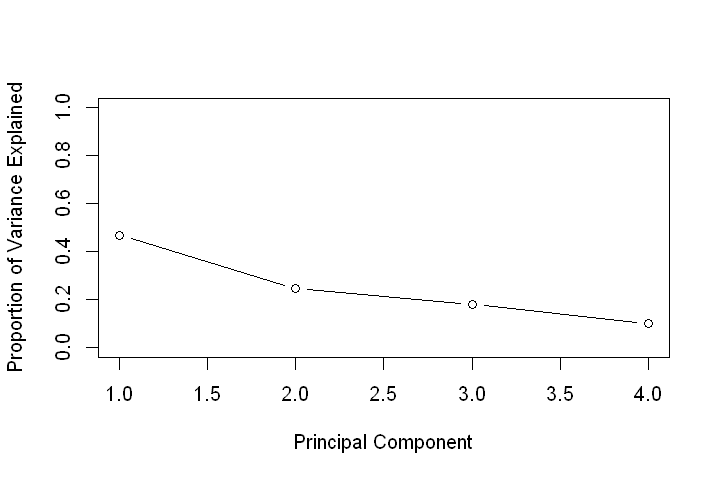

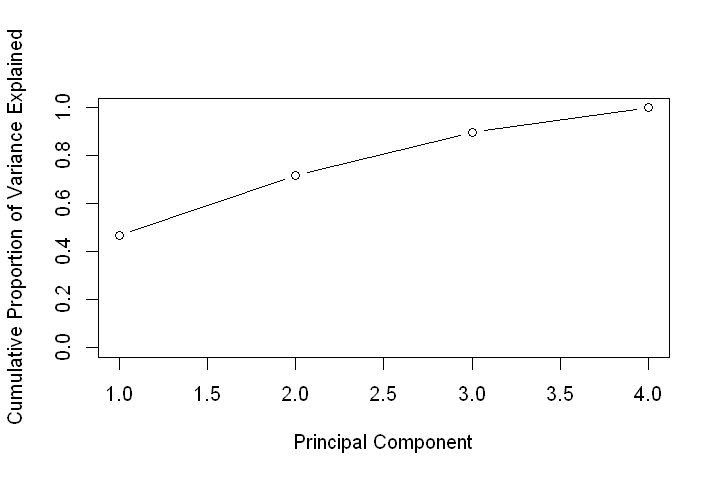

In [57]:
# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component",
     ylab = "Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

Notice that when the number of principal components is equal to the number of original features in the data, the cumulative proportion of variance explained is 1

### Practical issues: scaling

You saw in the video that scaling your data before doing PCA changes the results of the PCA modeling. Here, you will perform PCA with and without scaling, then visualize the results using biplots.

Sometimes scaling is appropriate when the variances of the variables are substantially different. This is commonly the case when variables have different units of measurement, for example, degrees Fahrenheit (temperature) and miles (distance). Making the decision to use scaling is an important step in performing a principal component analysis.

In [61]:
head(data)

Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False


In [64]:
data1 <- select(data, Total, HitPoints, Attack, Defense, Speed)
pokemon <- as.matrix(data1)
rownames(pokemon) <- data$Name

# Mean of each variable
colMeans(pokemon)

# Standard deviation of each variable
apply(pokemon, 2, sd)

Total HitPoints    Attack   Defense     Speed 
435.10250  69.25875  79.00125  73.84250  68.27750

Total HitPoints    Attack   Defense     Speed 
119.96304  25.53467  32.45737  31.18350  29.06047

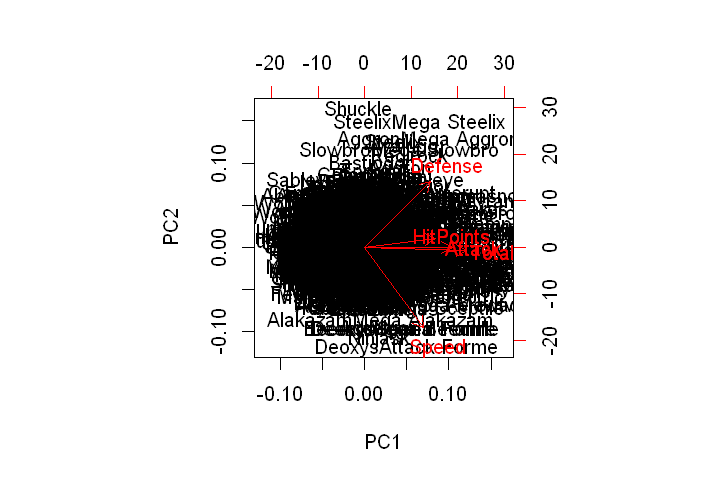

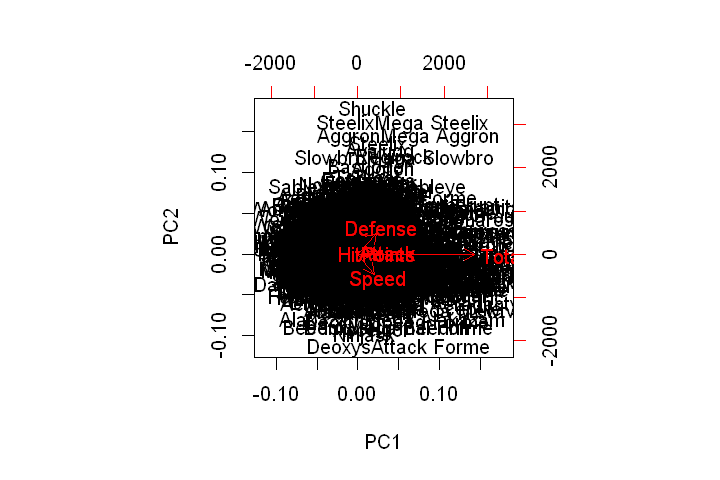

In [65]:

#PCA model with scaling: pr.with.scaling
pr.with.scaling <- prcomp(pokemon, center = TRUE, scale = TRUE)

# PCA model without scaling: pr.without.scaling
pr.without.scaling <- prcomp(pokemon, center = TRUE, scale = FALSE)

# Create biplots of both for comparison
biplot(pr.with.scaling)
biplot(pr.without.scaling)

The new Total column contains much more variation, on average, than the other four columns, so it has a disproportionate effect on the PCA model when scaling is not performed. After scaling the data, there's a much more even distribution of the loading vectors. 

# Case study - Human breast mass data

In [68]:
url <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_1903/datasets/WisconsinCancer.csv"

# Download the data: wisc.df
wisc.df <- read.csv(url)

head(wisc.df)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


In [69]:
glimpse(wisc.df)

Observations: 569
Variables: 33
$ id                      <int> 842302, 842517, 84300903, 84348301, 8435840...
$ diagnosis               <fct> M, M, M, M, M, M, M, M, M, M, M, M, M, M, M...
$ radius_mean             <dbl> 17.990, 20.570, 19.690, 11.420, 20.290, 12....
$ texture_mean            <dbl> 10.38, 17.77, 21.25, 20.38, 14.34, 15.70, 1...
$ perimeter_mean          <dbl> 122.80, 132.90, 130.00, 77.58, 135.10, 82.5...
$ area_mean               <dbl> 1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477....
$ smoothness_mean         <dbl> 0.11840, 0.08474, 0.10960, 0.14250, 0.10030...
$ compactness_mean        <dbl> 0.27760, 0.07864, 0.15990, 0.28390, 0.13280...
$ concavity_mean          <dbl> 0.30010, 0.08690, 0.19740, 0.24140, 0.19800...
$ concave.points_mean     <dbl> 0.14710, 0.07017, 0.12790, 0.10520, 0.10430...
$ symmetry_mean           <dbl> 0.2419, 0.1812, 0.2069, 0.2597, 0.1809, 0.2...
$ fractal_dimension_mean  <dbl> 0.07871, 0.05667, 0.05999, 0.09744, 0.05883...
$ radius_se         

In [70]:
# Convert the features of the data: wisc.data
wisc.data <- as.matrix(wisc.df[,3:32])

# Set the row names of wisc.data
row.names(wisc.data) <- wisc.df$id

# Create diagnosis vector
# Note that R coerces TRUE to 1 and FALSE to 0.
diagnosis <- as.numeric(wisc.df$diagnosis == "M")

### Exploratory data analysis

The first step of any data analysis, unsupervised or supervised, is to familiarize yourself with the data.

The variables you created before, wisc.data and diagnosis, are still available in your workspace. Explore the data to answer the following questions:

    How many observations are in this dataset?
    How many variables/features in the data are suffixed with _mean?
    How many of the observations have a malignant diagnosis?


In [72]:
dim(wisc.data) # 569 observation 

[1] 569  30

In [74]:
colnames(wisc.data) # 10 _mean features

[1] "radius_mean"             "texture_mean"           
 [3] "perimeter_mean"          "area_mean"              
 [5] "smoothness_mean"         "compactness_mean"       
 [7] "concavity_mean"          "concave.points_mean"    
 [9] "symmetry_mean"           "fractal_dimension_mean" 
[11] "radius_se"               "texture_se"             
[13] "perimeter_se"            "area_se"                
[15] "smoothness_se"           "compactness_se"         
[17] "concavity_se"            "concave.points_se"      
[19] "symmetry_se"             "fractal_dimension_se"   
[21] "radius_worst"            "texture_worst"          
[23] "perimeter_worst"         "area_worst"             
[25] "smoothness_worst"        "compactness_worst"      
[27] "concavity_worst"         "concave.points_worst"   
[29] "symmetry_worst"          "fractal_dimension_worst"

In [75]:
sum(diagnosis[diagnosis == 1]) # 212 malignant observation

[1] 212

### Performing PCA

The next step in your analysis is to perform PCA on wisc.data.

You saw in the last chapter that it's important to check if the data need to be scaled before performing PCA. Recall two common reasons for scaling data:

* The input variables use different units of measurement.
* The input variables have significantly different variances.


In [76]:
# Check column means and standard deviations
colMeans(wisc.data)
apply(wisc.data, 2, sd)

# Execute PCA, scaling if appropriate: wisc.pr
wisc.pr <- prcomp(wisc.data, center = TRUE, scale = TRUE)

# Look at summary of results
summary(wisc.pr)

radius_mean            texture_mean          perimeter_mean 
           1.412729e+01            1.928965e+01            9.196903e+01 
              area_mean         smoothness_mean        compactness_mean 
           6.548891e+02            9.636028e-02            1.043410e-01 
         concavity_mean     concave.points_mean           symmetry_mean 
           8.879932e-02            4.891915e-02            1.811619e-01 
 fractal_dimension_mean               radius_se              texture_se 
           6.279761e-02            4.051721e-01            1.216853e+00 
           perimeter_se                 area_se           smoothness_se 
           2.866059e+00            4.033708e+01            7.040979e-03 
         compactness_se            concavity_se       concave.points_se 
           2.547814e-02            3.189372e-02            1.179614e-02 
            symmetry_se    fractal_dimension_se            radius_worst 
           2.054230e-02            3.794904e-03            1.626919e+01 
          texture_worst         perimeter_worst              area_worst 
           2.567722e+01            1.072612e+02            8.805831e+02 
       smoothness_worst       compactness_worst         concavity_worst 
           1.323686e-01            2.542650e-01            2.721885e-01 
   concave.points_worst          symmetry_worst fractal_dimension_worst 
           1.146062e-01            2.900756e-01            8.394582e-02

radius_mean            texture_mean          perimeter_mean 
           3.524049e+00            4.301036e+00            2.429898e+01 
              area_mean         smoothness_mean        compactness_mean 
           3.519141e+02            1.406413e-02            5.281276e-02 
         concavity_mean     concave.points_mean           symmetry_mean 
           7.971981e-02            3.880284e-02            2.741428e-02 
 fractal_dimension_mean               radius_se              texture_se 
           7.060363e-03            2.773127e-01            5.516484e-01 
           perimeter_se                 area_se           smoothness_se 
           2.021855e+00            4.549101e+01            3.002518e-03 
         compactness_se            concavity_se       concave.points_se 
           1.790818e-02            3.018606e-02            6.170285e-03 
            symmetry_se    fractal_dimension_se            radius_worst 
           8.266372e-03            2.646071e-03            4.833242e+00 
          texture_worst         perimeter_worst              area_worst 
           6.146258e+00            3.360254e+01            5.693570e+02 
       smoothness_worst       compactness_worst         concavity_worst 
           2.283243e-02            1.573365e-01            2.086243e-01 
   concave.points_worst          symmetry_worst fractal_dimension_worst 
           6.573234e-02            6.186747e-02            1.806127e-02

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

### Interpreting PCA results

Now you'll use some visualizations to better understand your PCA model. You were introduced to one of these visualizations, the biplot, in an earlier chapter.

You'll run into some common challenges with using biplots on real-world data containing a non-trivial number of observations and variables, then you'll look at some alternative visualizations. You are encouraged to experiment with additional visualizations before moving on to the next exercise.

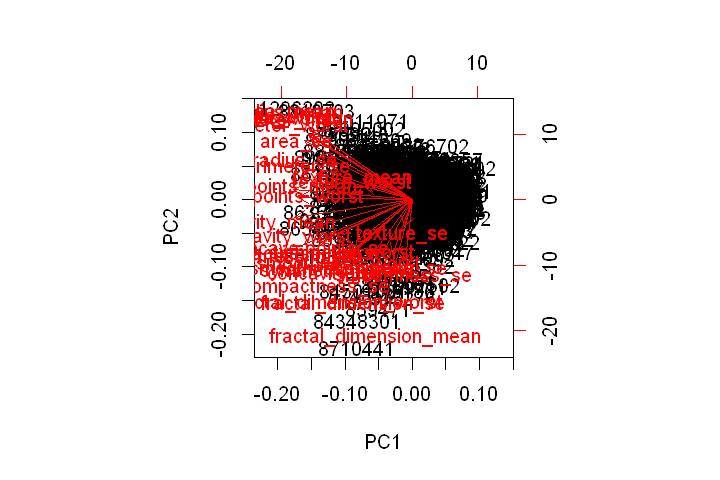

In [79]:
# Create a biplot of wisc.pr
biplot(wisc.pr)

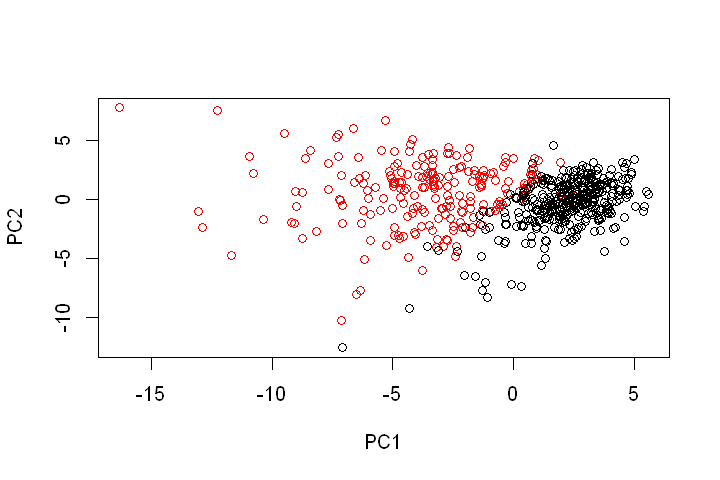

In [80]:
# Scatter plot observations by components 1 and 2
plot(wisc.pr$x[, c(1, 2)], col = (diagnosis + 1), 
     xlab = "PC1", ylab = "PC2")

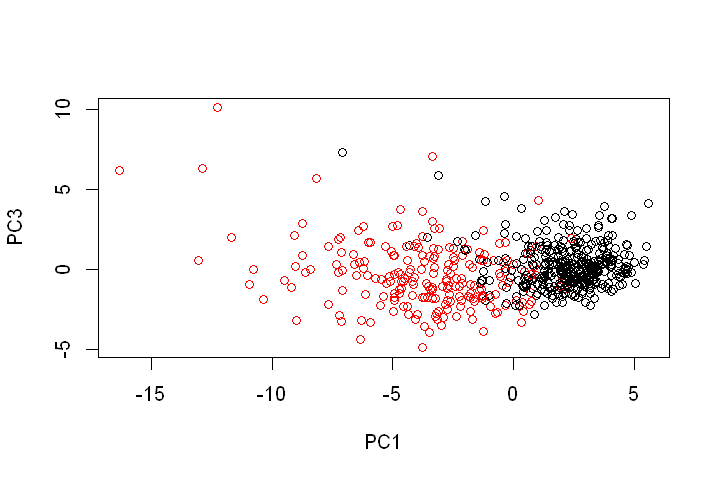

In [81]:
# Repeat for components 1 and 3
plot(wisc.pr$x[, c(1, 3)], col = (diagnosis + 1), 
     xlab = "PC1", ylab = "PC3")


Because principal component 2 explains more variance in the original data than principal component 3, you can see that the first plot has a cleaner cut separating the two subgroups

### Variance explained

In this exercise, you will produce scree plots showing the proportion of variance explained as the number of principal components increases. The data from PCA must be prepared for these plots, as there is not a built-in function in R to create them directly from the PCA model.

As you look at these plots, ask yourself if there's an elbow in the amount of variance explained that might lead you to pick a natural number of principal components. If an obvious elbow does not exist, as is typical in real-world datasets, consider how else you might determine the number of principal components to retain based on the scree plot.

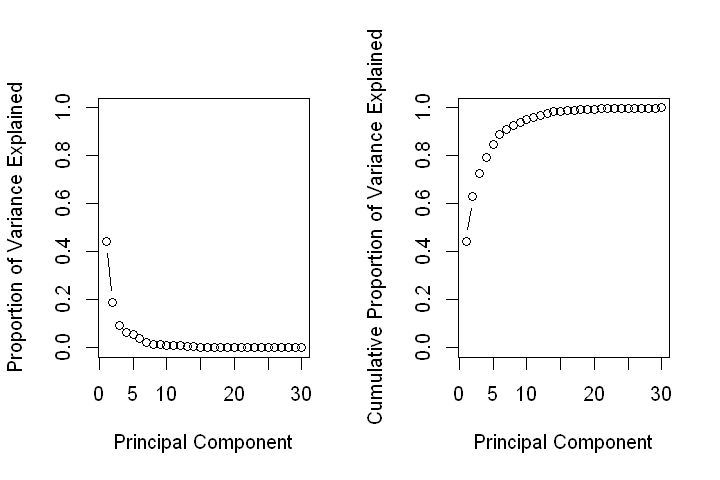

In [82]:
# Set up 1 x 2 plotting grid
par(mfrow = c(1, 2))

# Calculate variability of each component
pr.var <- wisc.pr$sdev^2

# Variance explained by each principal component: pve
pve <- pr.var / sum(pr.var)

# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component", 
     ylab = "Proportion of Variance Explained", 
     ylim = c(0, 1), type = "b")

# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component", 
     ylab = "Cumulative Proportion of Variance Explained", 
     ylim = c(0, 1), type = "b")

Before moving on, answer the following question: What is the minimum number of principal components needed to explain 80% of the variance in the data? 

4-5

In [83]:
summary(wisc.pr)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

### Hierarchical clustering of case data

The goal of this exercise is to do hierarchical clustering of the observations. Recall from Chapter 2 that this type of clustering does not assume in advance the number of natural groups that exist in the data.

As part of the preparation for hierarchical clustering, distance between all pairs of observations are computed. Furthermore, there are different ways to link clusters together, with single, complete, and average being the most common linkage methods.

In [84]:
# Scale the wisc.data data: data.scaled
data.scaled <- scale(wisc.data)

# Calculate the (Euclidean) distances: data.dist
data.dist <- dist(data.scaled)

# Create a hierarchical clustering model: wisc.hclust
wisc.hclust <- hclust(data.dist, method = "complete")

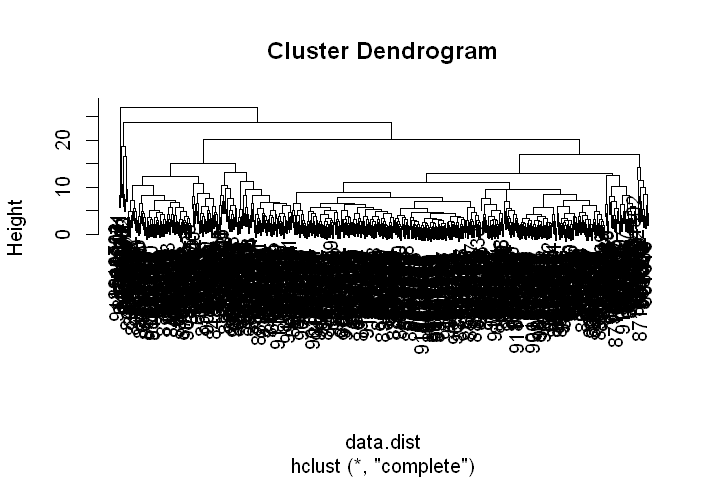

In [85]:
plot(wisc.hclust)

At 20 height the model has 4 clusters

### Selecting number of clusters

In this exercise, you will compare the outputs from your hierarchical clustering model to the actual diagnoses. Normally when performing unsupervised learning like this, a target variable isn't available. We do have it with this dataset, however, so it can be used to check the performance of the clustering model.

When performing supervised learning—that is, when you're trying to predict some target variable of interest and that target variable is available in the original data—using clustering to create new features may or may not improve the performance of the final model. This exercise will help you determine if, in this case, hierarchical clustering provides a promising new feature.

In [86]:
# Cut tree so that it has 4 clusters: wisc.hclust.clusters
wisc.hclust.clusters <- cutree(wisc.hclust, k = 4)

# Compare cluster membership to actual diagnoses
table(wisc.hclust.clusters, diagnosis)

                    diagnosis
wisc.hclust.clusters   0   1
                   1  12 165
                   2   2   5
                   3 343  40
                   4   0   2

Four clusters were picked after some exploration. Before moving on, you may want to explore how different numbers of clusters affect the ability of the hierarchical clustering to separate the different diagnoses.

### k-means clustering and comparing results

As you now know, there are two main types of clustering: hierarchical and k-means.

In this exercise, you will create a k-means clustering model on the Wisconsin breast cancer data and compare the results to the actual diagnoses and the results of your hierarchical clustering model. Take some time to see how each clustering model performs in terms of separating the two diagnoses and how the clustering models compare to each other.

In [87]:
# Create a k-means model on wisc.data: wisc.km, scale the data and repeat the algorithm 20 times to find a well performing model
wisc.km <- kmeans(scale(wisc.data), centers = 2, nstart = 20)

# Compare k-means to actual diagnoses
table(wisc.km$cluster, diagnosis)

# Compare k-means to hierarchical clustering
table(wisc.km$cluster, wisc.hclust.clusters)

   diagnosis
      0   1
  1 343  37
  2  14 175

   wisc.hclust.clusters
      1   2   3   4
  1  17   0 363   0
  2 160   7  20   2

Looking at the second table you generated, it looks like clusters 1, 2, and 4 from the hierarchical clustering model can be interpreted as the cluster 2 equivalent from the k-means algorithm, and cluster 3 can be interpreted as the cluster 1 equivalent. 

### Clustering on PCA results

In this final exercise, you will put together several steps you used earlier and, in doing so, you will experience some of the creativity that is typical in unsupervised learning.

Recall from earlier exercises that the PCA model required significantly fewer features to describe 80% and 95% of the variability of the data. In addition to normalizing data and potentially avoiding overfitting, PCA also uncorrelates the variables, sometimes improving the performance of other modeling techniques.

Let's see if PCA improves or degrades the performance of hierarchical clustering.

In [88]:
# Create a hierarchical clustering model: wisc.pr.hclust
wisc.pr.hclust <- hclust(dist(wisc.pr$x[,1:7]), method = "complete")

# Cut model into 4 clusters: wisc.pr.hclust.clusters
wisc.pr.hclust.clusters <- cutree(wisc.pr.hclust, k = 4)

# Compare to actual diagnoses
table(wisc.pr.hclust.clusters, diagnosis)

# Compare to k-means and hierarchical
table(wisc.hclust.clusters, diagnosis)
table(wisc.km$cluster, diagnosis)

                       diagnosis
wisc.pr.hclust.clusters   0   1
                      1   5 113
                      2 350  97
                      3   2   0
                      4   0   2

                    diagnosis
wisc.hclust.clusters   0   1
                   1  12 165
                   2   2   5
                   3 343  40
                   4   0   2

   diagnosis
      0   1
  1 343  37
  2  14 175